In [1]:
#read the dataset/import the file
import pandas as pd
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import  re
import nltk
from gensim.models import Word2Vec
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from keras.models import load_model # saving model for later use 

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import pandas as pd
xl = pd.ExcelFile("final_datasets8.xlsx")
df = xl.parse( header=None, names=['ID','Level','Date','Label','Msg'], encoding='utf-8')
df

,ID,Level,Date,Label,Msg
0,450812019270046,1,20/1/2021,1,Durbi garee kanaa hundishee akka waan durbumma...
1,451178209233427,1,20/1/2021,1,Durbif gaararraan waanuma argitetti bifasheef ...
2,451092299242018,1,20/1/2021,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...
3,450937722590809,1,20/1/2021,10,Durbi safuu beektu keessa kooti
4,451408632543718,1,20/1/2021,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...
...,...,...,...,...,...
12807,874138889673855_874148553006222,2,26/4/2021,40,CAALAA keenya dhugumaan caalaadha ati
12808,874138889673855_874148726339538,2,26/4/2021,40,Dhugaan karaatti hin haftu caaliyyee jabaadh...
12809,874138889673855_874152466339164,2,26/4/2021,40,Nuuf buli wan gumaachitu hin dhabin sanyii
12810,874138889673855_874152919672452,2,26/4/2021,40,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘


In [3]:
df.isnull().sum()

ID       0
Level    0
Date     0
Label    0
Msg      0
dtype: int64

In [4]:
##to know the number of each class data
df['Label'].value_counts()

3     1898
10    1741
4     1714
20    1559
1     1556
2     1468
40    1455
30    1421
Name: Label, dtype: int64

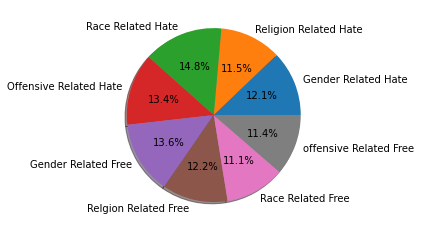

In [5]:
#data set Illustration by pie chart 
exp_vals = [  1556, 1468,  1898, 1714, 1741, 1559, 1421, 1455]
exp_labels = ["Gender Related Hate","Religion Related Hate","Race Related Hate","Offensive Related Hate","Gender Related Free","Relgion Related Free ","Race Related Free","offensive Related Free"]
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=1)
plt.show()

In [6]:
df.groupby('Label').describe()

Level                                             
        count      mean       std  min  25%  50%  75%  max
Label                                                     
1      1556.0  1.277635  0.447976  1.0  1.0  1.0  2.0  2.0
2      1468.0  1.369891  0.482939  1.0  1.0  1.0  2.0  2.0
3      1898.0  1.257640  0.437450  1.0  1.0  1.0  2.0  2.0
4      1714.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0
10     1741.0  1.103389  0.304554  1.0  1.0  1.0  1.0  2.0
20     1559.0  1.661321  0.473412  1.0  1.0  2.0  2.0  2.0
30     1421.0  1.046446  0.210523  1.0  1.0  1.0  1.0  2.0
40     1455.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0

In [7]:
df.drop(['ID','Level','Date'],axis='columns',inplace=True)
df

,Label,Msg
0,1,Durbi garee kanaa hundishee akka waan durbumma...
1,1,Durbif gaararraan waanuma argitetti bifasheef ...
2,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...
3,10,Durbi safuu beektu keessa kooti
4,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...
...,...,...
12807,40,CAALAA keenya dhugumaan caalaadha ati
12808,40,Dhugaan karaatti hin haftu caaliyyee jabaadh...
12809,40,Nuuf buli wan gumaachitu hin dhabin sanyii
12810,40,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘


In [8]:
df['Label1']=df['Label']
df

,Label,Msg,Label1
0,1,Durbi garee kanaa hundishee akka waan durbumma...,1
1,1,Durbif gaararraan waanuma argitetti bifasheef ...,1
2,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1
3,10,Durbi safuu beektu keessa kooti,10
4,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1
...,...,...,...
12807,40,CAALAA keenya dhugumaan caalaadha ati,40
12808,40,Dhugaan karaatti hin haftu caaliyyee jabaadh...,40
12809,40,Nuuf buli wan gumaachitu hin dhabin sanyii,40
12810,40,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,40


In [9]:
df.drop(['Label'],axis='columns',inplace=True)
df

,Msg,Label1
0,Durbi garee kanaa hundishee akka waan durbumma...,1
1,Durbif gaararraan waanuma argitetti bifasheef ...,1
2,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1
3,Durbi safuu beektu keessa kooti,10
4,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1
...,...,...
12807,CAALAA keenya dhugumaan caalaadha ati,40
12808,Dhugaan karaatti hin haftu caaliyyee jabaadh...,40
12809,Nuuf buli wan gumaachitu hin dhabin sanyii,40
12810,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,40


# 1. Data Pre-processing 

In [10]:
# WORD COUNT:
df['word_count'] = df['Msg'].apply(lambda x : len(str(x).split()))
df.head(450)

,Msg,Label1,word_count
0,Durbi garee kanaa hundishee akka waan durbumma...,1,11
1,Durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1,16
3,Durbi safuu beektu keessa kooti,10,5
4,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1,6
...,...,...,...
445,Shamarri durbummaa hin qabne farda luugama hin...,1,8
446,Jecha obboleettii keetin hin jenne obboloota b...,10,9
447,Durbuma Funyaan ishee hamma mokoronii ishee xi...,1,11
448,Shamarri dhaqna hin qabanne mi'a yookiin qodaa...,1,8


In [11]:
# Convert to Lower Case : 
df['Msg'] = df['Msg'].apply(lambda x : x.lower())
df['Msg'].head(2)
df

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
...,...,...,...
12807,caalaa keenya dhugumaan caalaadha ati,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadh...,40,8
12809,nuuf buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,40,7


In [12]:
#Removing any date format 
df["Msg"].replace(
    {'\d+[\/:\-]\d+[\/:\-\s]*[\dAaPpMm]*' : '', '\w+\s\d+[\,]\s\d+' : ''},
    regex=True,
    inplace=True,
    )


In [13]:
# Contaction to Expansion > can't TO can not ,you'll TO you will
contractions = { 
"fkn": "fakkeenya",
"ykn": "yookaan ",
"lakk.": "lakkoofsa",
"hub.": "hubachiisa",
"fbc": "faanaa broodkaastingi korporeet ",
"obn": "oromiyaa broodkaastingi neetwoork ",
"omn": "oromiyaa miidiyaa neetwoork ",
"fb": "feesbuukii",
"qar.": "qarshii",
"bill.": "billiyoona ",
"a.l.a": "akka lakkoofsa awurooppaa",
"a.l.i": "Akka Lakkoofsa Itoophiyaa",
"kkf": "kan kana fakkaatan",
"kkf.": "kan kana fakkaatan",    
"m/b": "mana barumsaa",
"prof.": "pirofeesara",
"dr.": "dooctar",
"dn.": "daaqon",
"i/g": "itti gaafatamaa",
"ob.": "obbo",
"obb.": "obbo",
"m/murtii": "mana Murtii",
"hosp.": "hospitaala",
"mm.": "muumee Ministeeraa",
"dh.k.d": "dhaloota kiristoosin duura",
"dh.k.b": " dhaloota kiristoosin booda",
"h/bulaa": "hoorsisee Bulaa",
"q/bulaa": "qoonaan bulaa",
"A.B.O": "adda Bilisa baasa uummata oromoo ",
"pmns": "prezdaantii mootummaa naannoo somaalee",
"pmno": "prezdaantii mootummaa naannoo oromiyaa",  
"pmna": "prezdaantii mootummaa naannoo amaaraa",   
"pmng": "prezdaantii mootummaa naannoo gambeellaa", 
"pmnbg": "prezdaantii mootummaa naannoo benishaangul gumuuz",
"a.s.w": "assalaamu'aleykum warahmatullahi wabarakaatuhu",
"asw": "assalaamu'aleykum warahmatullahi wabarakaatuhu",    
"jzk": "jazakallah ",
"s.w.a": "sallallaahu aleeyhi wasallam ",    
"alh": "allah",
"b.b.o": "biiroo barnoota oromiyaa",
"k.b.r": " kolleejjii barsiisota roobee ",
"k.b.a": " kolleejjii barsiisota asallaa ",    
"k.b.j": " kolleejjii barsiisota jimmaa ",   
"k.b.y": " kolleejjii barsiisota yaa'aballoo ",  
"k.b.s": " kolleejjii barsiisota sabbataa ",       
"db.f.o": "dhaabbata fayyaa oromiyaa ",
"m.n.o": "mootummaa naannoo oromiyaa",
"mno": "mootummaa naannoo oromiyaa",    
"r.i.b": "raayyaa ittisa biyyaa",
"a.b.u.t": "adda bilisa baasa uummata tigraayi ",
"t.p.l.f": "adda bilisa baasa uummata tigraayi ",    
"kk": "kkk",
"kkk" :"kkk",
"kkkk":"kkk",
"kkkkk":"kkk",
"kkkkkk":"kkk",
"kkkkkkk":"kkk",
"hh":"hhh" ,
"hhh":"hhh",
"hhhh":"hhh",
"hhhhh":"hhh",
"hhhhhh":"hhh",
"hhhhhhh":"hhh",
"wow":"wow",
"woow":"wow",
"wooow":"wow",
"woooow":"wow",
"wooooow":"wow",
"woooooow":"wow",
"www":"wow",
"wwhoo":"wow",
"ohh":"ooh",
"oohh":"ooh",
"oohhh":"ooh",
"ohh":"ooh",
"oohh":"ooh",
"ooohhh":"ooh",
"akkka":"akka",    
"uuf":"uuf",
"uuuf":"uuf",
"uuuuf":"uuf",
"uuuuuf":"uuf",
"uuuuuuf":"uuf",
"uuff":"uuf",
"uuff":"uuf",
"uufff":"uuf",
"uuffff":"uuf",
"uufffff":"uuf",
"uuffffff":"uuf ",
"uffee":"uffee",
"uffeee":"uffee",
"ufee":"uffee",
"ufeeee":"uffee",
"baay'ee": "baayyee",
"ja'a": "jaha ",
"keecha" : "keessa",
"har'a": "harra ",
"ajaa'iba":" ajaayiba ",
"qeeyroo":"qeerroo ",
"bal'aa": "ballaa ",
"qal'oo" : "qalloo",
"keeysa":"keessa",
"worra": "warra",
"mul'ta":"Mullata" ,
"xoophiyaa":"itoophiyaa",
"yuunibaristii":"yuunivarsiitii" ,
"wonti" :" wanti",
"umrii" :" umurii",
"waa'ee" :"waayee",
"re'ee" :"rehee",
"dhalaa": "dubara",
"keeysan" :" keessan",
"qur'aana" :" quraana",
"sheeyxana" :" seexana",
"ba'e":"bahe",
"wahii":"wayii",
"macaafa":"kitaaba",
"dhagahuu":"dhaga'uu",
"dhageeysa":"dhageecha" ,
"rabbi":"waaqa",
"beetti":"beekti",
"fuundura" :" fuuldura",
"keeysa" :"  keessa",
"olkaa'uu": "olkaawuu",
"obboleeysa": "obbolessa",
"wal'aalaa":"wallaalaa" ,  
"wal'aalaan":"wallaalaan"   
}
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
df['Msg'] = df['Msg'].apply(lambda x : cont_to_exp(x))


In [14]:
df

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
...,...,...,...
12807,caalaa keenya dhugumaan caalaadha ati,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadh...,40,8
12809,nuuf buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,40,7


In [15]:
# remove Institutional Email
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'([A-Za-z0-9+_]+\.[A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)','', i))


In [16]:
# Remove normal email
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'([A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)','', i))

In [17]:
df.head(50)


,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
5,durba jechuun haadha,10,3
6,durbi yeroo muuzii argitu maalif saree raqa ar...,1,9
7,dhiira jechuun abbaadha,10,3
8,durbaaf baaqelli karaa jalaa bilchaatti,1,5
9,dhiirri furdaan tiraasif malee firaashif hin t...,1,7


In [18]:
# Remove URL
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+','', i))
df.head()

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6


In [19]:
# Remove more than one white space 
df['Msg'] = df['Msg'].apply(lambda d : " ".join(d.split()))


In [20]:
# Remove HTML tags 
from bs4 import BeautifulSoup
df['Msg'] = df['Msg'].apply(lambda x : BeautifulSoup(x, 'lxml').get_text())


In [21]:
# Removing special charcter and Puncutation marks & number 
spec_chars = ["!","-",'"',"#","%","&","(",")", 
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
            "`","{","|","}","~","–"]
for char in spec_chars:
    df['Msg'] = df['Msg'].str.replace(char, ' ')

In [22]:
# Replacing ’ with apostrophe(') this is not work pls find and replace from excell 
spec_chars2 = ["’"]
for chars in spec_chars2:
    df['Msg'] = df['Msg'].str.replace(chars, " ' ")

In [23]:
# remove Stop word 
read=open("stopword.txt",encoding='latin',mode='r')
readfirst=read.read()
def remove_stop_word(x):
    filtered_words = [word for word in x.split() if word not in readfirst]
    return " ".join(filtered_words)
df['Msg'] = df['Msg'].apply(lambda x : remove_stop_word(x))
df


,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40,8
12809,buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca dhugaa keeti jajjabee ❤️💚❤️💘💘💘💘,40,7


In [24]:
df

,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40,8
12809,buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca dhugaa keeti jajjabee ❤️💚❤️💘💘💘💘,40,7


In [25]:
# Removing Emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['Msg'] = df['Msg'].apply(lambda x :  remove_emoji(x))
df

,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40,8
12809,buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca dhugaa keeti jajjabee,40,7


In [26]:
df.drop(['word_count'],axis='columns',inplace=True)
df

,Msg,Label1
0,durbi garee hundishee durbummaa qabduu dhiira ...,1
1,durbif gaararraan waanuma argitetti bifasheef ...,1
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1
3,durbi safuu beektu kooti,10
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1
...,...,...
12807,caalaa dhugumaan caalaadha,40
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40
12809,buli wan gumaachitu hin dhabin sanyii,40
12810,leenca dhugaa keeti jajjabee,40


In [27]:
cleaneddf=df
cleaneddf

,Msg,Label1
0,durbi garee hundishee durbummaa qabduu dhiira ...,1
1,durbif gaararraan waanuma argitetti bifasheef ...,1
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1
3,durbi safuu beektu kooti,10
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1
...,...,...
12807,caalaa dhugumaan caalaadha,40
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40
12809,buli wan gumaachitu hin dhabin sanyii,40
12810,leenca dhugaa keeti jajjabee,40


In [28]:
df['Msg'] = df['Msg'].str.replace('\d+', '')
df['Msg'].str.findall('\w{2,}').str.join(' ')

0        durbi garee hundishee durbummaa qabduu dhiira ...
1        durbif gaararraan waanuma argitetti bifasheef ...
2        durbummaa namni qabu hundi gagamaa addunyaan m...
3                                 durbi safuu beektu kooti
4        durbummaa mataan haxxifannaan hiikatu jibbisiisam
                               ...                        
12807                           caalaa dhugumaan caalaadha
12808    dhugaan karaatti hin haftu caaliyyee jabaadhu ...
12809                buli wan gumaachitu hin dhabin sanyii
12810                         leenca dhugaa keeti jajjabee
12811                               jiraadhu leenca keenya
Name: Msg, Length: 12812, dtype: object

In [29]:
def plot_word_cloud(data):
    words=""
    for sent in data:
        sent= str(sent)
        sent=sent.lower()
        tokens= sent.split()
        words +=" ".join(tokens)+" "
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=800, background_color='aqua').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')


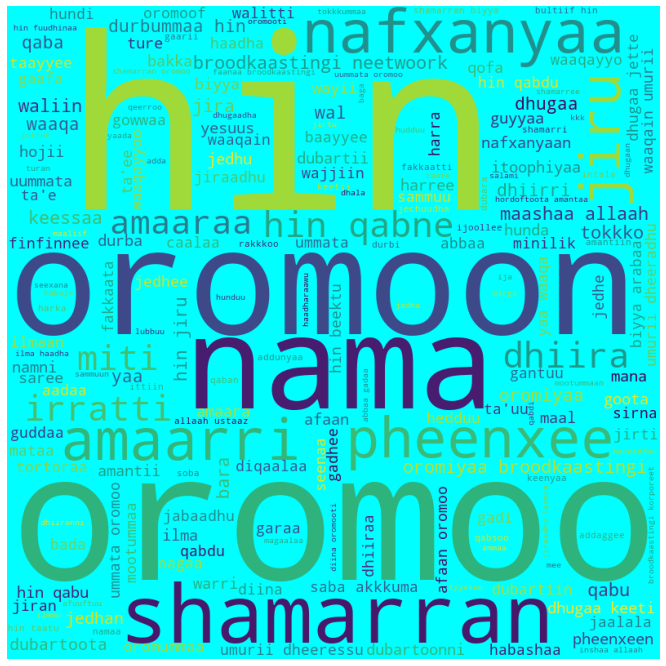

In [30]:
plot_word_cloud(cleaneddf.Msg)

In [31]:
#train and test split
from sklearn.model_selection import train_test_split
X=df['Msg']
Y=df['Label1']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print('total number of row in dataframe  '+ str(len(X_train)+len(X_test)))

10249
2563
10249
2563
total number of row in dataframe  12812


In [32]:
#Tokenizing 
from keras.preprocessing.text import Tokenizer
num_words = 1000000 # this means 15000 unique words can be taken 
tokenizer=Tokenizer(num_words)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [33]:
vocab_size=len(tokenizer.word_index) # this is whole unique words in our corpus
vocab_size
total_message=df_total
tokenizer.fit_on_texts(total_message)
max_length=max([len(s.split()) for s in total_message])
#define vocabulary size
vocab_size=len(tokenizer.word_index)+1
print('longest sentence is data set have  ' + str(max_length))
print('Unique number of word in dataset '+str(vocab_size))

longest sentence is data set have  48
Unique number of word in dataset 20700


In [34]:
#pad_sequences
from keras.preprocessing.sequence import pad_sequences
X_trains =tokenizer.texts_to_sequences(X_train)
X_trains_pads=pad_sequences(X_trains,maxlen=max_length,padding='post', truncating='post')
X_tests = tokenizer.texts_to_sequences(X_test)
X_test_pads = pad_sequences(X_tests, maxlen = max_length, padding = 'post',truncating='post')


In [35]:
# size checking and padding visualization
print(X_trains_pads.shape)
print(X_test_pads.shape)

print(X_trains[5])
print(X_trains_pads[5])


(10249, 48)
(2563, 48)
[160, 72, 22, 181, 1228, 8856, 176, 54, 139, 181, 133]
[ 160   72   22  181 1228 8856  176   54  139  181  133    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [36]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import os, re, csv, math, codecs
print('load word embedding...')
embedding_index = {}
#tokenizer = RegexpTokenizer(r'\w+')
f = codecs.open('C:/Users/Tashe/myfinalcode/8class of classification/BYML/myword2vecfinal.txt', encoding='unicode_escape')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float64')
    embedding_index[word] = coefs
f.close()
print('found %s word vectors' % len(embedding_index))

load word embedding...


45593it [00:30, 1475.87it/s]

found 45593 word vectors


In [37]:
embed_dim=100

In [38]:

MAX_NB_WORDS = 100000
word_index = tokenizer.word_index
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if(i>=nb_words):
        continue
    embedding_vector = embedding_index.get(word)
    if(embedding_vector is not None) and len(embedding_vector)>0:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('Number of null words embeddings found %d' % np.sum(np.sum(embedding_matrix, axis=1)==0))

Number of null words embeddings found 1378


In [39]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# LSTM Model Building

In [40]:
# Parameters
maxlen=max_length
batch_size=64
embeeding_dims=100

In [41]:
#from keras.layers import Dense, LSTM, SpatialDropout1D, Bidirectional,
from keras.layers import Dense, Dropout,Activation,SpatialDropout1D
from keras.layers import Dense, Embedding, LSTM, Bidirectional,Flatten

from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
model = Sequential()
model.add(Embedding(vocab_size, embed_dim, input_length=max_length, weights=[embedding_matrix], trainable=True))
model.add(SpatialDropout1D(0.7))
model.add(Bidirectional(LSTM(128, recurrent_dropout = 0.3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(41, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 100)           2070000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 48, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               234496    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 41)                10537     
Total params: 2,315,033
Trainable params: 2,315,033
Non-trainable params: 0
______________________________________________

In [42]:
# train the model 
history=model.fit(X_trains_pads, y_train, batch_size=64, epochs=20, validation_data=(X_test_pads,y_test), verbose=1,callbacks=[early_stopping])


Epoch 1/20
161/161 [==============================] - 124s 657ms/step - loss: 2.3127 - accuracy: 0.2643 - val_loss: 0.8013 - val_accuracy: 0.7288
Epoch 2/20
161/161 [==============================] - 98s 607ms/step - loss: 1.1374 - accuracy: 0.5899 - val_loss: 0.6783 - val_accuracy: 0.7600
Epoch 3/20
161/161 [==============================] - 102s 636ms/step - loss: 0.9795 - accuracy: 0.6428 - val_loss: 0.6205 - val_accuracy: 0.7760
Epoch 4/20
161/161 [==============================] - 99s 615ms/step - loss: 0.9083 - accuracy: 0.6650 - val_loss: 0.5966 - val_accuracy: 0.7905
Epoch 5/20
161/161 [==============================] - 114s 711ms/step - loss: 0.7985 - accuracy: 0.7167 - val_loss: 0.5735 - val_accuracy: 0.7971
Epoch 6/20
161/161 [==============================] - 130s 810ms/step - loss: 0.7649 - accuracy: 0.7272 - val_loss: 0.5438 - val_accuracy: 0.8096
Epoch 7/20
161/161 [==============================] - 128s 796ms/step - loss: 0.7446 - accuracy: 0.7337 - val_loss: 0.5353 - v

In [43]:
scores = model.evaluate(X_test_pads, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

81/81 [==============================] - 7s 83ms/step - loss: 0.4791 - accuracy: 0.8314
Accuracy: 83.14%


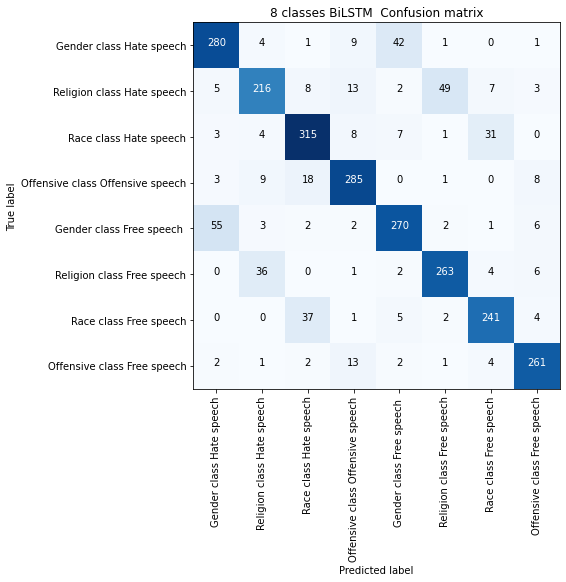

In [44]:
import matplotlib.pylab as plt
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,normalize=False):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('8 classes BiLSTM  Confusion matrix')
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {1: 'Gender class Hate speech', 2: 'Religion class Hate speech',3:'Race class Hate speech',4:'Offensive class Offensive speech',10: 'Gender class Free speech ', 20: 'Religion class Free speech',30:'Race class Free speech',40:'Offensive class Free speech'}
#category={0,1,2,3}

y_pred = model.predict(X_test_pads)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = (y_test)

#y_pred = model.predict(x_test_pad)
#y_pred = np.argmax(y_pred1, axis=1)
confusion_mat = confusion_matrix(y_true, y_pred_classes)
#plot_confusion_matrix(confusion_mat, classes = 'category)
plot_confusion_matrix(confusion_mat, classes = list(dict_characters.values()))

In [45]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_pads, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

41/41 [==============================] - 6s 139ms/step
              precision    recall  f1-score   support

           1       0.80      0.83      0.82       338
           2       0.79      0.71      0.75       303
           3       0.82      0.85      0.84       369
           4       0.86      0.88      0.87       324
          10       0.82      0.79      0.80       341
          20       0.82      0.84      0.83       312
          30       0.84      0.83      0.83       290
          40       0.90      0.91      0.91       286

    accuracy                           0.83      2563
   macro avg       0.83      0.83      0.83      2563
weighted avg       0.83      0.83      0.83      2563



In [46]:
history.history

{'loss': [1.7346456050872803,
  1.0916852951049805,
  0.9661921858787537,
  0.8774328827857971,
  0.8069754242897034,
  0.754702091217041,
  0.7186572551727295,
  0.6791138648986816,
  0.6316706538200378,
  0.6043053865432739,
  0.5822587609291077,
  0.5554531812667847,
  0.5362347364425659,
  0.5126695036888123,
  0.4998916685581207,
  0.47168245911598206,
  0.44390034675598145,
  0.43397554755210876,
  0.41762983798980713],
 'accuracy': [0.4026734232902527,
  0.6067909002304077,
  0.6504049301147461,
  0.6787979602813721,
  0.7121670246124268,
  0.7286564707756042,
  0.7426090240478516,
  0.7550004720687866,
  0.7753927111625671,
  0.7888574600219727,
  0.7909064292907715,
  0.8045663237571716,
  0.8093472719192505,
  0.8198848962783813,
  0.8259342312812805,
  0.8358864188194275,
  0.8441799283027649,
  0.8498390316963196,
  0.8557907938957214],
 'val_loss': [0.8013209700584412,
  0.6783120632171631,
  0.620501697063446,
  0.5965876579284668,
  0.5734875202178955,
  0.54375529289245

In [47]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title(' Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title(' Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Train loss' , 'Val loss'], loc='upper center')
  plt.show()


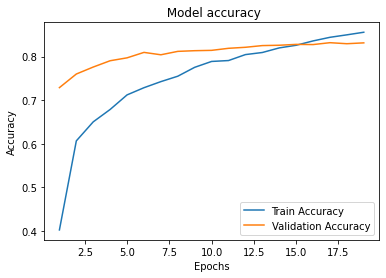

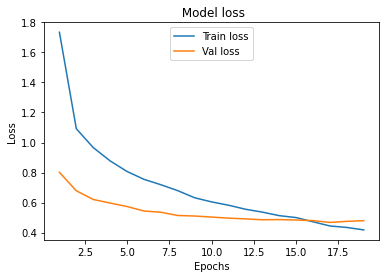

In [49]:
plot_learningCurve(history, 19)


In [50]:
model.predict(X_test_pads[2])

array([[4.8200422e-04, 2.9666406e-01, 2.3635017e-04, ..., 2.2962141e-04,
        4.1304942e-04, 3.2965562e-04],
       [1.9293895e-02, 3.8465347e-02, 4.6813052e-02, ..., 1.9890016e-02,
        2.0206951e-02, 2.9796109e-02],
       [7.6356013e-03, 4.3130353e-01, 6.9929464e-03, ..., 3.7058734e-03,
        5.9431088e-03, 5.4947366e-03],
       ...,
       [2.0665007e-02, 2.5650345e-02, 2.6714701e-02, ..., 2.3341782e-02,
        2.1388395e-02, 3.1915929e-02],
       [2.0665007e-02, 2.5650345e-02, 2.6714701e-02, ..., 2.3341782e-02,
        2.1388395e-02, 3.1915929e-02],
       [2.0665007e-02, 2.5650345e-02, 2.6714701e-02, ..., 2.3341782e-02,
        2.1388395e-02, 3.1915929e-02]], dtype=float32)

# Prediction Test

In [51]:
twt = [ "durba gabaabduu hin fuudhinaa"]
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, padding='post', maxlen=48, dtype='int64', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 1)[0]
if(np.argmax(sentiment) == 1):
    print("Gender reated hate ")
elif (np.argmax(sentiment) == 10):
    print("Gender Related Free")
elif (np.argmax(sentiment) == 2):
    print("Religion Related Hate")
elif (np.argmax(sentiment) == 20):
    print("Religion Related Free")
elif (np.argmax(sentiment) == 3):
    print("Race Related Hate")
elif (np.argmax(sentiment) == 30):
    print("Race Related Free")
elif (np.argmax(sentiment) == 4):
    print("Offensive Related Hate")
elif (np.argmax(sentiment) == 40):
    print("Offensive Related Not Hate")


[[ 47 239   1 271   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
1/1 [==============================] - 2s 2s/step
Gender reated hate 


# Saving Model for later use 

In [52]:
#save model 
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model folder/pretbilstmmodelend.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model folder/pretbilstmmodelend.h5")
print("Saved model to disk")

Saved model to disk


In [53]:
# load json and create model
from keras.models import model_from_json
json_file = open('model folder/pretbilstmmodelend.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model folder/pretbilstmmodelend.h5")
print("Loaded model from disk")

Loaded model from disk


# Load and check 

In [54]:

# Load and predict from saved place 

twt = [ "durba gabaabduu hin fuudhinaa"]
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, padding='post', maxlen=48, dtype='int64', value=0)
print(twt)
sentiment = loaded_model.predict(twt,batch_size=1,verbose = 1)[0]
if(np.argmax(sentiment) == 1):
    print("Gender reated hate ")
elif (np.argmax(sentiment) == 10):
    print("Gender Related Free")
elif (np.argmax(sentiment) == 2):
    print("Religion Related Hate")
elif (np.argmax(sentiment) == 20):
    print("Religion Related Free")
elif (np.argmax(sentiment) == 3):
    print("Race Related Hate")
elif (np.argmax(sentiment) == 30):
    print("Race Related Free")
elif (np.argmax(sentiment) == 4):
    print("Offensive Related Hate")
elif (np.argmax(sentiment) == 40):
    print("Offensive Related Not Hate")


[[ 47 239   1 271   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
1/1 [==============================] - 2s 2s/step
Gender reated hate 


# Build Prototype 

In [33]:
import re
from flask import Flask,render_template,url_for,request
import pandas as pd 
import numpy as np
from flask import Flask
from gevent.pywsgi import WSGIServer

app = Flask(__name__)

app.config['TESTING'] = True

@app.route('/')
def home():
	return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    from keras.models import model_from_json
    json_file = open('model folder/pretbilstmmodelend.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model folder/pretbilstmmodelend.h5")
    print("Loaded model from disk")

    if request.method == 'POST':
        message = request.form['message']
        data1 = [message]
        data=list(map(lambda x: x.lower(), data1))
    from textblob import TextBlob

    def no_user_alpha(data):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        read=open("stopword.txt",encoding='utf-8',mode='r')
        readfirst=read.read()
        clean_mess = [word for word in clean_s.split() if word not in readfirst]
        return clean_mess
    contractions = { 
        "fkn": "fakkeenya",
        "ykn": "yookaan ",
        "lakk.": "lakkoofsa",
        "hub.": "hubachiisa",
        "fbc": "faanaa broodkaastingi korporeet ",
        "obn": "oromiyaa broodkaastingi neetwoork ",
        "omn": "oromiyaa miidiyaa neetwoork ",
        "fb": "feesbuukii",
        "qar.": "qarshii",
        "bill.": "billiyoona ",
        "a.l.a": "akka lakkoofsa awurooppaa",
        "a.l.i": "Akka Lakkoofsa Itoophiyaa",
        "kkf": "kan kana fakkaatan",
        "kkf.": "kan kana fakkaatan",    
        "m/b": "mana barumsaa",
        "prof.": "pirofeesara",
        "dr.": "dooctar",
        "dn.": "daaqon",
        "i/g": "itti gaafatamaa",
        "ob.": "obbo",
        "obb.": "obbo",
        "m/murtii": "mana Murtii",
        "hosp.": "hospitaala",
        "mm.": "muumee Ministeeraa",
        "dh.k.d": "dhaloota kiristoosin duura",
        "dh.k.b": " dhaloota kiristoosin booda",
        "h/bulaa": "hoorsisee Bulaa",
        "q/bulaa": "qoonaan bulaa",
        "A.B.O": "adda Bilisa baasa uummata oromoo ",
        "pmns": "prezdaantii mootummaa naannoo somaalee",
        "pmno": "prezdaantii mootummaa naannoo oromiyaa",  
        "pmna": "prezdaantii mootummaa naannoo amaaraa",   
        "pmng": "prezdaantii mootummaa naannoo gambeellaa", 
        "pmnbg": "prezdaantii mootummaa naannoo benishaangul gumuuz",
        "a.s.w": "assalaamu'aleykum warahmatullahi wabarakaatuhu",
        "asw": "assalaamu'aleykum warahmatullahi wabarakaatuhu",    
        "jzk": "jazakallah ",
        "s.w.a": "sallallaahu aleeyhi wasallam ",    
        "alh": "allah",
        "b.b.o": "biiroo barnoota oromiyaa",
        "k.b.r": " kolleejjii barsiisota roobee ",
        "k.b.a": " kolleejjii barsiisota asallaa ",    
        "k.b.j": " kolleejjii barsiisota jimmaa ",   
        "k.b.y": " kolleejjii barsiisota yaa'aballoo ",  
        "k.b.s": " kolleejjii barsiisota sabbataa ",       
        "db.f.o": "dhaabbata fayyaa oromiyaa ",
        "m.n.o": "mootummaa naannoo oromiyaa",
        "mno": "mootummaa naannoo oromiyaa",    
        "r.i.b": "raayyaa ittisa biyyaa",
        "a.b.u.t": "adda bilisa baasa uummata tigraayi ",
        "t.p.l.f": "adda bilisa baasa uummata tigraayi ",    
        "kk": "kkk",
        "kkk" :"kkk",
        "kkkk":"kkk",
        "kkkkk":"kkk",
        "kkkkkk":"kkk",
        "kkkkkkk":"kkk",
        "hh":"hhh" ,
        "hhh":"hhh",
        "hhhh":"hhh",
        "hhhhh":"hhh",
        "hhhhhh":"hhh",
        "hhhhhhh":"hhh",
        "wow":"wow",
        "woow":"wow",
        "wooow":"wow",
        "woooow":"wow",
        "wooooow":"wow",
        "woooooow":"wow",
        "www":"wow",
        "wwhoo":"wow",
        "ohh":"ooh",
        "oohh":"ooh",
        "oohhh":"ooh",
        "ohh":"ooh",
        "oohh":"ooh",
        "ooohhh":"ooh",
        "akkka":"akka",    
        "uuf":"uuf",
        "uuuf":"uuf",
        "uuuuf":"uuf",
        "uuuuuf":"uuf",
        "uuuuuuf":"uuf",
        "uuff":"uuf",
        "uuff":"uuf",
        "uufff":"uuf",
        "uuffff":"uuf",
        "uufffff":"uuf",
        "uuffffff":"uuf ",
        "uffee":"uffee",
        "uffeee":"uffee",
        "ufee":"uffee",
        "ufeeee":"uffee",
        "baay'ee": "baayyee",
        "ja'a": "jaha ",
        "keecha" : "keessa",
        "har'a": "harra ",
        "ajaa'iba":" ajaayiba ",
        "qeeyroo":"qeerroo ",
        "bal'aa": "ballaa ",
        "qal'oo" : "qalloo",
        "keeysa":"keessa",
        "worra": "warra",
        "mul'ta":"Mullata" ,
        "xoophiyaa":"itoophiyaa",
        "yuunibaristii":"yuunivarsiitii" ,
        "wonti" :" wanti",
        "umrii" :" umurii",
        "waa'ee" :"waayee",
        "re'ee" :"rehee",
        "dhalaa": "dubara",
        "keeysan" :" keessan",
        "qur'aana" :" quraana",
        "sheeyxana" :" seexana",
        "ba'e":"bahe",
        "wahii":"wayii",
        "macaafa":"kitaaba",
        "dhagahuu":"dhaga'uu",
        "dhageeysa":"dhageecha" ,
        "rabbi":"waaqa",
        "beetti":"beekti",
        "fuundura" :" fuuldura",
        "keeysa" :"  keessa",
        "olkaa'uu": "olkaawuu",
        "obboleeysa": "obbolessa",
        "wal'aalaa":"wallaalaa" ,  
        "wal'aalaan":"wallaalaan"   
        }
    def cont_to_exp(data):
        if type(data) is str:
            for key in contractions:
                value = contractions[key]
                data = data.replace(key, value)
            return data
        else:
            return data

            normalized_tweet.append(normalized_text)
        return normalized_tweet
    # Removing Emoji
    def remove_emoji(data):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', data)
 
    tests_tokens=tokenizer.texts_to_sequences(data)

    tests_tokens_pad=pad_sequences(tests_tokens,padding='post', maxlen=48, dtype='int64', value=0)
    print(tests_tokens_pad)
    predicted=loaded_model.predict(tests_tokens_pad,batch_size=1,verbose = 1)
    my_prediction = np.argmax(predicted, axis=1)
    prediction = my_prediction

    
    return render_template('index.html',prediction = my_prediction)

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 5001 ,app)

    
    

 * Running on http://localhost:5001/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Oct/2021 01:53:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Oct/2021 01:53:23] "GET /static/css/bootstrap.min.css HTTP/1.1" 304 -
127.0.0.1 - - [22/Oct/2021 01:53:24] "GET /js/bootstrap.min.js HTTP/1.1" 404 -
127.0.0.1 - - [22/Oct/2021 01:53:24] "GET /favicon.ico HTTP/1.1" 404 -


Loaded model from disk
[[   4 3618    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]
1/1 [==============================] - 1s 716ms/step


127.0.0.1 - - [22/Oct/2021 01:54:07] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [22/Oct/2021 01:54:07] "GET /js/bootstrap.min.js HTTP/1.1" 404 -


Loaded model from disk
[[8557  343  204    4 8113    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]
1/1 [==============================] - 1s 1s/step


127.0.0.1 - - [22/Oct/2021 03:42:44] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [22/Oct/2021 03:42:44] "GET /js/bootstrap.min.js HTTP/1.1" 404 -


Loaded model from disk
[[8557  343  586  528    2  255  316  107   33    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]
1/1 [==============================] - 1s 1s/step


127.0.0.1 - - [22/Oct/2021 03:43:30] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [22/Oct/2021 03:43:30] "GET /js/bootstrap.min.js HTTP/1.1" 404 -
